In [346]:
import statistics
import queue
from collections import namedtuple
import numpy as np
from tqdm import tqdm

In [388]:
with open('./data/gc_50_3', 'r') as input_data_file:
    input_data = input_data_file.read()
    
lines = input_data.split('\n')

first_line = lines[0].split()
node_count = int(first_line[0])
edge_count = int(first_line[1])

edges = []
for i in range(1, edge_count + 1):
    line = lines[i]
    parts = line.split()
    edges.append((int(parts[0]), int(parts[1])))

In [389]:
node_count, edge_count

(50, 350)

In [390]:
mapping = dict()
coloring = dict()
colors_available = dict()
q = queue.Queue()

for idx in range(node_count):
    coloring[idx] = 0

for idx in range(node_count):
    colors_available[idx] = list(range(node_count))
    
for idx in range(node_count):
    mapping[idx] = []

for i, j in edges:
    mapping[i].append(j)
    mapping[j].append(i)

In [391]:
mapping = dict(sorted(mapping.items(), key=lambda e: len(e[1]), reverse=True))

In [392]:
mapping

{45: [0,
  1,
  3,
  4,
  5,
  6,
  12,
  17,
  19,
  21,
  25,
  27,
  28,
  29,
  32,
  33,
  34,
  35,
  36,
  40,
  44,
  47,
  49],
 7: [3,
  5,
  9,
  14,
  18,
  20,
  21,
  22,
  24,
  26,
  31,
  32,
  35,
  37,
  40,
  41,
  44,
  46,
  47,
  49],
 33: [3, 6, 9, 11, 15, 16, 17, 18, 26, 28, 31, 34, 39, 41, 43, 44, 45, 46, 47],
 35: [1, 3, 6, 7, 9, 11, 16, 18, 27, 28, 29, 32, 34, 36, 39, 40, 41, 42, 45],
 32: [5, 7, 8, 11, 17, 22, 23, 24, 26, 27, 34, 35, 36, 39, 42, 45, 47, 49],
 47: [1, 2, 4, 7, 8, 11, 19, 20, 22, 27, 32, 33, 36, 40, 42, 43, 45, 46],
 16: [1, 4, 6, 8, 12, 15, 17, 19, 25, 29, 30, 33, 35, 38, 41, 46, 48],
 27: [1, 4, 8, 15, 22, 23, 24, 26, 29, 30, 32, 35, 41, 44, 45, 47, 48],
 42: [0, 2, 5, 10, 18, 19, 20, 23, 26, 32, 35, 36, 38, 41, 44, 47, 49],
 44: [4, 7, 9, 15, 17, 20, 21, 22, 27, 29, 33, 34, 41, 42, 43, 45, 49],
 6: [15, 16, 17, 18, 20, 23, 24, 28, 29, 33, 35, 37, 41, 43, 45, 46],
 11: [3, 8, 15, 18, 20, 22, 28, 31, 32, 33, 34, 35, 37, 41, 46, 47],
 15: [1,

In [393]:
# q.put(2)
counter = 0

for start_node in tqdm(mapping):
    
    if isinstance(colors_available[start_node], list):
        colors_available[start_node] = colors_available[start_node][0]
    else:
        continue

    q.put(start_node)
    
    while not q.empty():

        start_node = q.get()
        for j in mapping[start_node]:
            
            if not isinstance(colors_available[j], list):
                continue
            if colors_available[j][0] == colors_available[start_node]:
                colors_available[j].remove(colors_available[start_node])
                
            if start_node in mapping[j]:
                mapping[j].remove(start_node)
    
            counter+=1

            q.put(j)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 20.06it/s]


In [394]:
len(set(colors_available.values())), counter

(6, 422904)

In [385]:
counter

50

In [386]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(edges)

total_colors = len(set(colors_available.values())) - 1

values = [colors_available.get(node, 0.25)/total_colors for node in G.nodes()]

black_edges = [edge for edge in G.edges()]

# for layer, nodes in enumerate(nx.topological_generations(G)):
#     # `multipartite_layout` expects the layer as a node attribute, so add the
#     # numeric layer value as a node attribute
#     for node in nodes:
#         G.nodes[node]["layer"] = layer


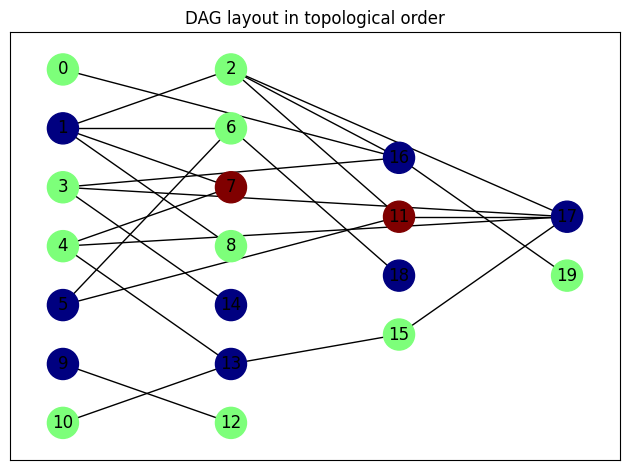

In [387]:
for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

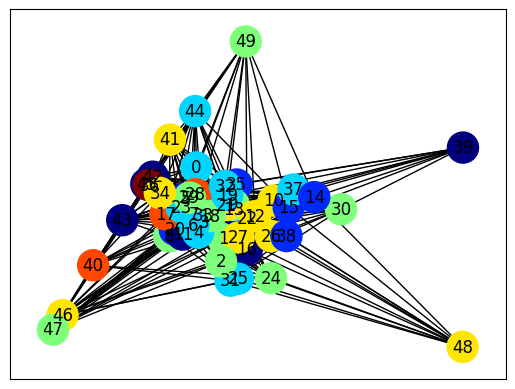

In [310]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = values, node_size = 500)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=False)


plt.show()

In [112]:
# # q.put(2)
# start_node = 1
# # master_set = set()
# explored_nodes.append(start_node)
# colors_available[start_node] = colors_available[start_node][0]

# filtered_nodes = set(mapping[start_node]) - set(explored_nodes) ## Remove explored nodes

# for j in filtered_nodes:
#     ## coloring unavailable
#     if colors_available[j][0] == colors_available[start_node]:
#         colors_available[j].remove(colors_available[start_node])
        
#     # common = set(mapping[start_node]).intersection(set(mapping[j]))
#     # master_set = master_set.union(common)

In [114]:
filtered_nodes

{6, 7, 8}

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 1: 0,
 2: 1,
 3: 1,
 4: 1,
 5: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 6: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 7: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 8: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 9: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 10: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 11: 2,
 12: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 13: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 14: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 15: 1,
 16: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 17: 0,
 18: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 19: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,

In [83]:
mapping

{17: [2, 3, 4, 11, 15],
 1: [2, 6, 7, 8],
 2: [1, 11, 16, 17],
 16: [0, 2, 3, 19],
 3: [14, 16, 17],
 4: [7, 13, 17],
 6: [1, 5, 18],
 11: [2, 5, 17],
 13: [4, 10, 15],
 5: [6, 11],
 7: [1, 4],
 15: [13, 17],
 0: [16],
 8: [1],
 9: [12],
 10: [13],
 12: [9],
 14: [3],
 18: [6],
 19: [16]}

In [ ]:
counter = 0


for i in tqdm(mapping):
    
    if not mapping[i]:
        continue
        
    for j in mapping[i]:
        # print(i, j)
        if coloring[i] == coloring[j]:
            coloring[j]+=1
            # print(f'Coloring {j}: {coloring[j]}')
            
        # if i in mapping[j]:
        #     mapping[j].remove(i)

        counter+=1
        

In [ ]:
len(set(coloring.values())), counter

In [ ]:
coloring

In [ ]:
mapping

In [ ]:
# counter = 0
# for i in mapping.keys():
#     if not mapping[i]:
#         continue
#     print(mapping)
#     for j in mapping[i]:
#         print(i, j)
#         if coloring[i] <= coloring[j]:
#             coloring[i]+=1
            
#             if i in mapping[j]:
#                 mapping[j].remove(i)

#             print(f'Coloring {i}: {coloring[i]}')
#         counter += 1

# counter

In [ ]:
len(set(coloring.values())) #20_1 -> 9 58 loops

In [ ]:
coloring